# Family Medical Care Delayed

### Danielle Medellin

## Problem Statement

"The National Health Interview Survey (NHIS) is conducted annually by the National Center for Health Statistics (NCHS). The NHIS administers face-to-face interviews in a nationally representative sample of households. Each month a probability sample of the civilian non-institutionalized population of the United States is interviewed by personnel of the U.S. Bureau of the Census. Information is obtained about the health and other characteristics of each member of the household."

The 2018 NHIS consists of five questionnaires - Household, Family, Adult, Child, and Cover. For the purposes of this project, we will only be focusing on the Family questionnaire and data. 

"The 2018 NHIS contains the core questions, enhanced questions on health care access and utilization, and additional supplemental questions in the Family questionnaire on the subject of food security."

Using this information, we will try to determine what factors could potentially lead to a family resisting seeking out medical care due to worries regarding the cost. Based on a family's profile, can we predict the likelihood of a member of that family delaying care. 

## Table of Contents
- [Library Import](#Import-Libraries)
- [Data Import](#Import-Data)
- [Data Cleaning](#Data-Cleaning)

## Resources

https://www.cdc.gov/reproductivehealth/data_stats/index.htm

https://www.cdc.gov/nchs/hus/contents2018.htm?search=,,

https://www.cdc.gov/nchs/nhis/data-questionnaires-documentation.htm *****

2018 NATIONAL HEALTH INTERVIEW SURVEY (NHIS) June 27, 2019 PUBLIC USE DATA RELEASE (Readme pdf)

DURING THE PAST 12 MONTHS, has medical care been delayed for {you/anyone in the family} because of worry about the cost?

DURING THE PAST 12 MONTHS, was there any time when {you/someone in the family} needed medical care, but did not get it because {you/the family} couldn't afford it?

## Import Libraries
[Back to ToC](#Table-of-Contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data
[Back to ToC](#Table-of-Contents)

In [10]:
data = pd.read_csv('familyxx.csv')

In [91]:
data.shape

(30309, 127)

Our dataset has 127 columns with 30,309 observations. 

## Data Cleaning
[Back to ToC](#Table-of-Contents)

In [29]:
features = ['FM_SIZE', 'FM_TYPE','FLNGINTV', 'FM_KIDS', 'FM_ELDR','FM_EDUC1',
           'F10DVCT', 'FDMEDCT', 'FHOSP2CT', 'FNMEDCT', 'FSRUNOUT', 'FSBALANC',
            'FHSTATEX', 'FHSTATVG', 'FHSTATG', 'FHSTATFR', 'FHSTATPR', 'FSNAPMYR',
            'INCGRP5', 'FHIPRVCT', 'FHICARCT', 'FHICADCT', 'FHICOST', 'FMEDBILL', 
            'FHICOVCT', 'FHIEBCCT'
           ]

In [81]:
# new column names 
new_col_names = {'FM_SIZE' : 'fam_size',
                'FM_TYPE' : 'fam_type',
                'FLNGINTV' : 'language',
                 'FM_KIDS' : 'num_child',
                 'FM_ELDR' : 'num_elder',
                 'FM_EDUC1': 'max_educ',
                 'F10DVCT' : 'care_10', # 12 mo
                 'FDMEDCT' : 'care_delayed', # 12 mo
                 'FHOSP2CT': 'hosp_ovrngt', # 12 mo
                 'FNMEDCT' : 'no_care_when_need', # 12 mo
                 'FSRUNOUT' : 'food_runout', # 30 days
                 'FSBALANC' : 'food_balance', # 30 days
                 'FHSTATEX' : 'health_ex',
                 'FHSTATVG' : 'health_vg',
                 'FHSTATG' : 'health_g',
                 'FHSTATFR' : 'health_fr',
                 'FHSTATPR' : 'health_pr',
                 'FSNAPMYR' : 'mos_snap_ben', # last cal yr
                 'INCGRP5' : 'fam_income', 
                 'FHIPRVCT' : 'priv_health_ins',
                 'FHICARCT' : 'num_medicare',
                 'FHICADCT' : 'num_medicaid',
                 'FHICOST' : 'fam_med_den_cost',
                 'FMEDBILL' : 'difficult_pay_bills',
                 'FHICOVCT' : 'health_cov',
                 'FHIEBCCT' : 'employer_cov'
                }

# replacing ordinal values with human readable values 
# 'fam_type'
family_types = {1 : 'one_adult_no_child',
               2 : 'mult_adult_no_child',
               3 : 'one_adult_child',
               4 : 'mult_adult_child',
               9 : 'unknown'}

# 'language'
languages = {1 :'english',
             2 : 'spanish',
             3 : 'english_spanish',
             4 : 'other',
             8 : 'not_ascertained'}

# 'max_educ'
education = {
    1: 'no_hs_diploma',
    2: 'no_hs_diploma',
    3: 'GED',
    4: 'hs_grad',
    5: 'some_college',
    6: 'associates',
    7: 'associates',
    8: 'bachelors',
    9: 'masters_doctoral',
    97:'unknown',
    98:'unknown',
    99:'unknown'
}

# 'food_runout' and 'food_balance'
food = {
    1 : 'often_true',
    2 : 'sometimes_true',
    3 : 'never_true',
    7 : 'unknown',
    8 : 'unknown',
    9 : 'unknown'
}

# 'fam_income'
income = {
    1 : '0-34_999',
    2 : '35_000-74_999',
    3 : '75_000-99_999',
    4 : '100_000_more',
    96 : 'unknown',
    99 : 'unknown'
}

# 'fam_med_den_cost'
costs = {
    0 : 'zero',
    1 : 'less_than_500',
    2 : '500-1_999',
    3 : '2_000-2_999',
    4 : '3_000-4_999',
    5 : '5_000_more',
    7 : 'unknown',
    8 : 'unknown',
    9 : 'unknown'
}

# 'difficult_pay_bills'
pay_bills = {
    1 : 'yes',
    2 : 'no',
    7 : 'unknown',
    8 : 'unknown',
    9 : 'unknown'
}

In [95]:
health = data[features].copy() # copy of og data frame with selected columns
health.columns = health.columns.map(new_col_names) # rename columns

# rename variables from ordinal values to labels 
health['fam_type'] = health['fam_type'].map(family_types)
health['language'] = health['language'].map(languages)
health['max_educ'] = health['max_educ'].map(education)
health['food_runout'] = health['food_runout'].map(food)
health['food_balance'] = health['food_balance'].map(food)
health['fam_income'] = health['fam_income'].map(income)
health['fam_med_den_cost'] = health['fam_med_den_cost'].map(costs)
health['difficult_pay_bills'] = health['difficult_pay_bills'].map(pay_bills)

# fill NaN w/ 0s
health['mos_snap_ben'] = health['mos_snap_ben'].fillna(0)
health['mos_snap_ben'] = health['mos_snap_ben'].map(lambda x: 0 if (x > 12) else x)
health['employer_cov'] = health['employer_cov'].fillna(0)

# creating a dummy column of the target variable 0 = 0, >0 = 1
health['care_delayed_dum'] = [0 if entry == 0 else 1 for entry in health['care_delayed']]

health.head()

,fam_size,fam_type,language,num_child,num_elder,max_educ,care_10,care_delayed,hosp_ovrngt,no_care_when_need,...,mos_snap_ben,fam_income,priv_health_ins,num_medicare,num_medicaid,fam_med_den_cost,difficult_pay_bills,health_cov,employer_cov,care_delayed_dum
0,1,one_adult_no_child,english,0,1,no_hs_diploma,0,0,0,0,...,0.0,0-34_999,0,1,0,less_than_500,no,1,0.0,0
1,3,mult_adult_child,english,1,0,some_college,0,2,0,1,...,0.0,35_000-74_999,3,0,0,500-1_999,yes,3,3.0,1
2,4,mult_adult_child,english,2,0,masters_doctoral,1,0,0,0,...,0.0,100_000_more,4,0,0,500-1_999,no,4,4.0,0
3,3,mult_adult_child,english,1,0,associates,0,0,0,0,...,0.0,75_000-99_999,3,0,0,2_000-2_999,no,3,3.0,0
4,1,one_adult_no_child,english,0,1,no_hs_diploma,1,1,0,1,...,12.0,0-34_999,1,1,0,500-1_999,yes,1,0.0,1


In [96]:
health.isnull().sum().sum()

0

## Eploratory Data Analysis

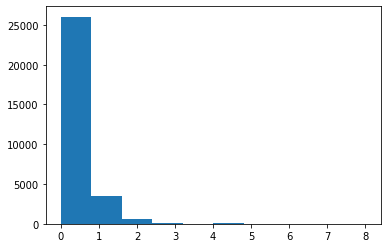

In [97]:
plt.hist(health['care_delayed']);

In [98]:
health['care_delayed'].value_counts(normalize=True)

0    0.858920
1    0.116401
2    0.019004
3    0.003530
4    0.001485
5    0.000462
6    0.000099
8    0.000066
7    0.000033
Name: care_delayed, dtype: float64

In [102]:
health['care_delayed_dum'].value_counts()

0    26033
1     4276
Name: care_delayed_dum, dtype: int64

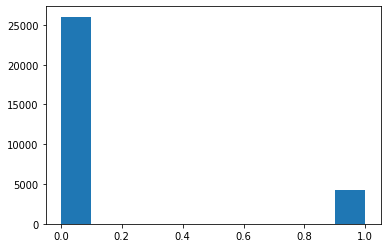

In [101]:
plt.hist(health['care_delayed_dum']);

### Numerical Variables

In [147]:
health.describe()

,fam_size,num_child,num_elder,care_10,care_delayed,hosp_ovrngt,no_care_when_need,health_ex,health_vg,health_g,health_fr,health_pr,mos_snap_ben,priv_health_ins,num_medicare,num_medicaid,health_cov,employer_cov,care_delayed_dum
count,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.000000,30309.00000
mean,2.402950,0.549837,0.426045,0.259659,0.174602,0.194167,0.114685,0.828434,0.748392,0.575143,0.192088,0.056452,1.120822,1.489854,0.457884,0.388202,2.167871,1.228282,0.14108
std,1.440013,1.016006,0.686352,0.527159,0.488282,0.453468,0.387177,1.323510,1.104588,0.947516,0.493446,0.257038,3.366065,1.451814,0.713043,1.010183,1.420637,1.473889,0.34811
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.00000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,0.00000
max,13.000000,10.000000,4.000000,8.000000,8.000000,4.000000,8.000000,11.000000,10.000000,13.000000,8.000000,4.000000,12.000000,10.000000,9.000000,12.000000,12.000000,10.000000,1.00000


In [168]:
num_cols = ['care_delayed','fam_size', 'num_child', 'num_elder', 'mos_snap_ben', 'health_cov']

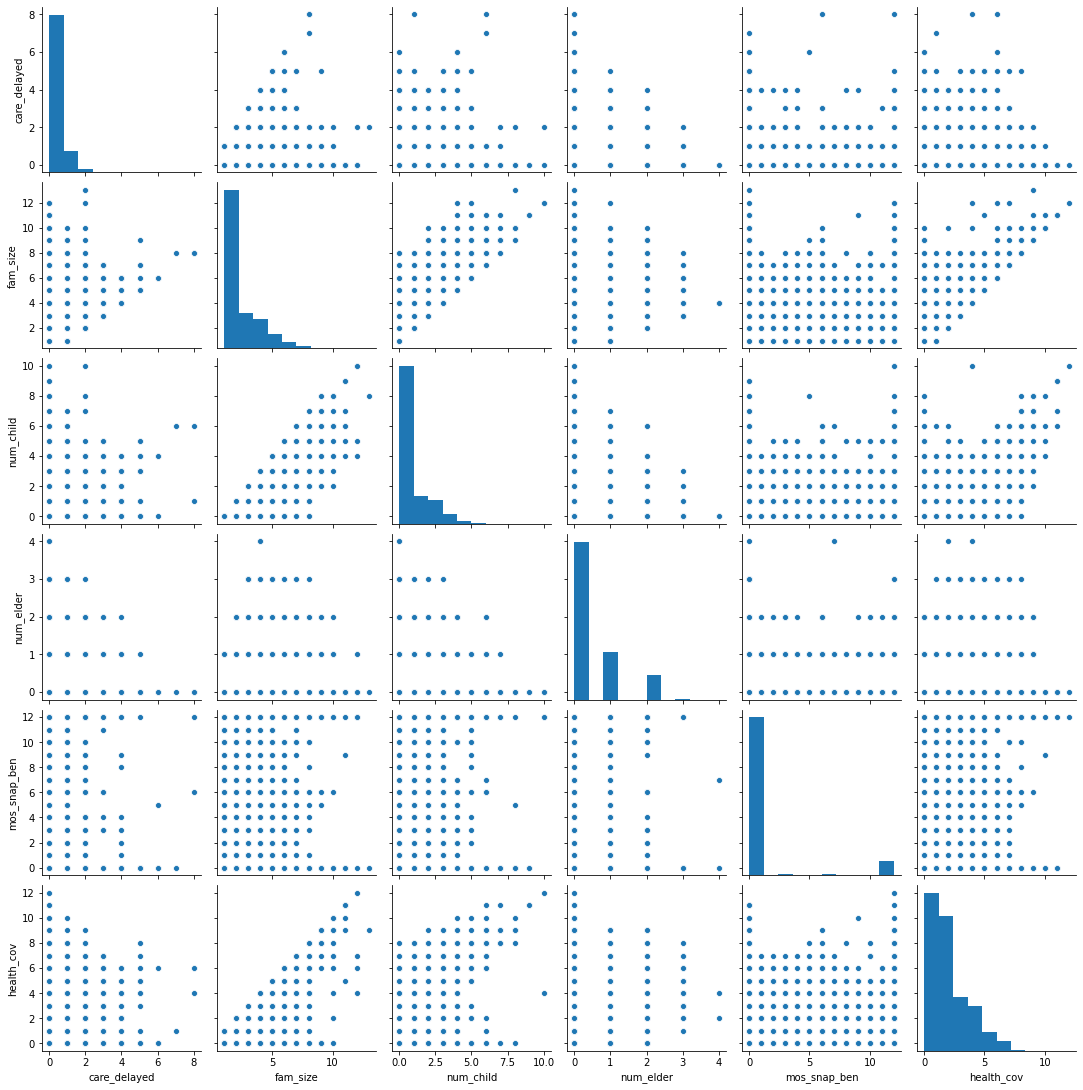

In [169]:
sns.pairplot(health[num_cols]);

### Categorical Variables

In [135]:
target_pct = health['care_delayed_dum'].value_counts(normalize=True)[1]

In [145]:
def plot_pct_target(y, pct_width, target_width, colors, y_label):
    """
    Plots 2 horizontal bar charts, the first showing the percentage breakdown of each category in feature. The second showing the percentage of target for each category.
    
    Parameters:
    y: labels for y axis
    pct_width: values for percentage break down
    target_width: values for target pct
    colors: takes list of colors (min 2)
    y_label: y label for graphs
    """
    
    fig, axes = plt.subplots(figsize=(14,5), ncols=2)

    axes[0].set_title(f'Percentage of {y_label}s',size=16)
    axes[0].barh(y=y, width=pct_width, color=colors[0])
    axes[0].set_ylabel(y_label,size=13)
    axes[0].set_xlabel('Percentage',size=13)
    
    axes[1].set_title(f'Percentage of Experienced Delayed Care by {y_label}',size=16)
    axes[1].barh(y=y, width=target_width, color=colors[1])
    axes[1].set_ylabel(y_label,size=13)
    axes[1].set_xlabel('Percentage of Families that have Experienced Delayed Care',size=13)
    axes[1].axvline(x=target_pct, color = 'red')
    
    fig.tight_layout();
    

In [142]:
def dc_pct_values(column, column_pcts):
    dc_pct_list = []
    for typ in column_pcts.index:
        dc_pct = health.loc[(health[column]==typ) & (health['care_delayed_dum']==1)].shape[0] / health.loc[health[column]==typ].shape[0]
        dc_pct_list.append(dc_pct)
    return dc_pct_list

In [137]:
fam_type_pct = health['fam_type'].value_counts(normalize=True)

In [143]:
fam_type_dc_pct = dc_pct_values('fam_type', fam_type_pct)

In [133]:
fam_type_labels = ['Multiple Adults, No Children', 'One Adult, No Children', 'Multiple Adults, 1+ Children', 'One Adult, 1+ Children']

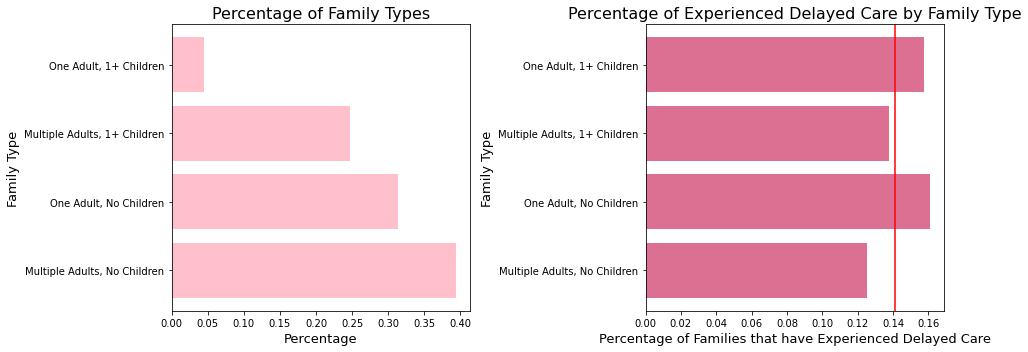

In [146]:
plot_pct_target(fam_type_labels, fam_type_pct, fam_type_dc_pct, ['pink','palevioletred'], 'Family Type')

 Regarding the family structure variables, emancipated minors are treated as adults regardless of their age. This variable does not have a single true source; please refer to the Survey Description Document for more information.

In [153]:
max_educ_pct = health['max_educ'].value_counts(normalize=True)
max_educ_dc_pct = dc_pct_values('max_educ', max_educ_pct)

In [149]:
max_educ_labels = ['Bachelors Degree', 'Masters or Doctoral Degree', 'High School Grad','Some College',
                  'Associates Degree', 'No HS Diploma', 'GED Recipient', 'Unknown']

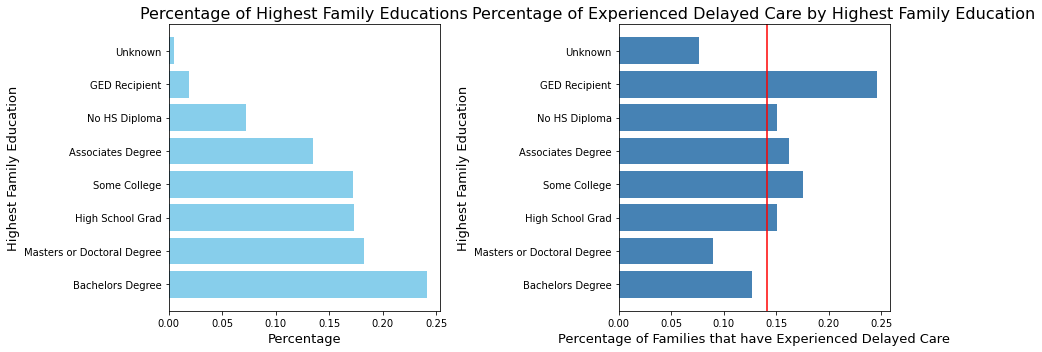

In [152]:
plot_pct_target(max_educ_labels, max_educ_pct, max_educ_dc_pct, ['skyblue', 'steelblue'], 'Highest Family Education')

Education of adult with highest education in family

In [154]:
food_runout_pct = health['food_runout'].value_counts(normalize=True)
food_runout_dc_pct = dc_pct_values('food_runout', food_runout_pct)

In [156]:
food_runout_labels = ['Never True', 'Sometimes True', 'Often True', 'Unknown']

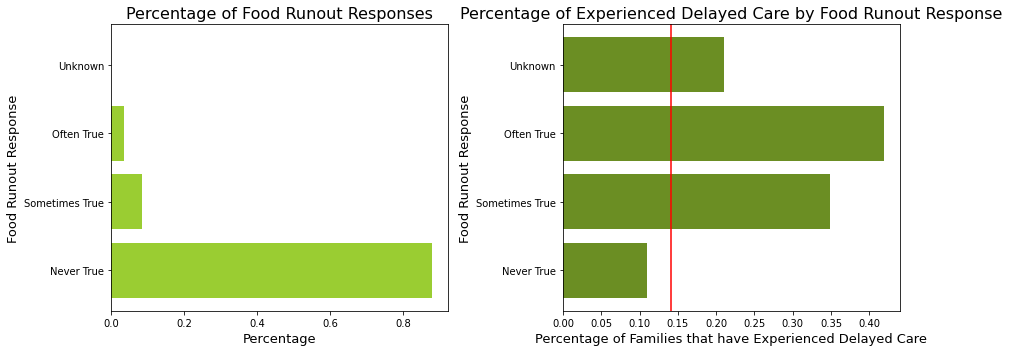

In [161]:
plot_pct_target(food_runout_labels, food_runout_pct, food_runout_dc_pct, ['yellowgreen','olivedrab'], 'Food Runout Response')

"[fill 2: I/We] worried whether [fill 3: my/our] food would run out before [fill 4: I/we] got money to buy more." Was that often true, sometimes true, or never true for [fill 1: you/your family] in the last 30 days?

In [158]:
food_balance_pct = health['food_balance'].value_counts(normalize=True)
food_balance_dc_pct = dc_pct_values('food_balance', food_balance_pct)

In [159]:
food_balance_pct

never_true        0.901580
sometimes_true    0.066746
often_true        0.030816
unknown           0.000858
Name: food_balance, dtype: float64

In [160]:
food_balance_labels = ['Never True', 'Sometimes True', 'Often True', 'Unknown']

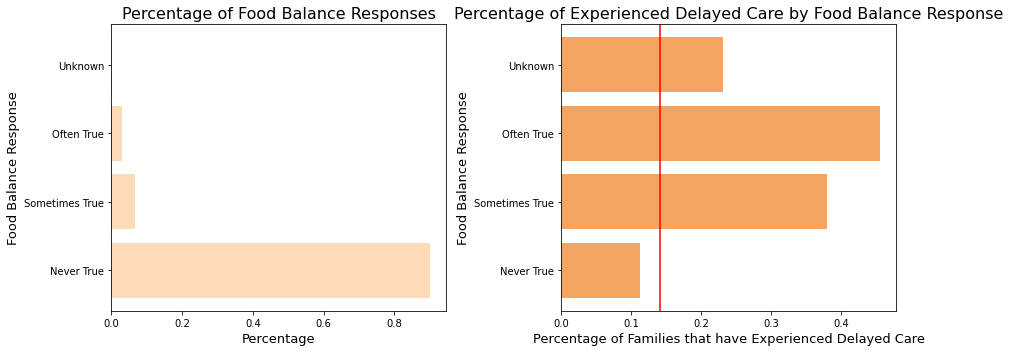

In [162]:
plot_pct_target(food_balance_labels, food_balance_pct, food_balance_dc_pct, ['peachpuff','sandybrown'], 'Food Balance Response')

"[fill 1: I/We] couldn't afford to eat balanced meals." Was that often true, sometimes true, or never true for [fill 2:
you/your family] in the last 30 days?